# 1. Loading the dataset

In [5]:
import pandas as pd

In [6]:
df_train = pd.read_csv("train.csv")
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


- keyword: 61 missing values (~0.8%). -> To be filled with unknown
- location: Significant missing values (~33%). Might have to drop these columns

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


# 2. Understanding the Data Distribution

In [10]:
df_train["target"].value_counts(normalize=True) # get percentage of each class

target
0    0.57034
1    0.42966
Name: proportion, dtype: float64

- Data set is slightly imbalanced (more non-disaster tweets than disaster tweets).
- Might need class balancing techniques later.

In [11]:
df_train["keyword"].value_counts().head(10) # Top 10 most common keywords

keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
Name: count, dtype: int64

- Words like "fatalities," "deluge," "damage," and "evacuate" strongly indicate disasters.
- The presence of body%20bags suggests URL encoding issues (e.g., %20 should be a space). This needs cleaning during preprocessing.

# 3. Handling Missing Values

In [12]:
df_train["keyword"].fillna("Unknown", inplace=True)
df_train["location"].fillna("Unknown", inplace=True)

df_test["keyword"].fillna("Unknown", inplace=True)
df_test["location"].fillna("Unknown", inplace=True)

C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\682147546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["keyword"].fillna("Unknown", inplace=True)
C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\682147546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Null values replaced with 'Unknown'

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7613 non-null   object
 2   location  7613 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3263 non-null   object
 2   location  3263 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


Check for URL encoding issues in the keyword column

In [15]:
df_train["keyword"].unique()[:50]

array(['Unknown', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide'], dtype=object)

In [16]:
df_test["keyword"].unique()[:50]

array(['Unknown', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide'], dtype=object)

In [17]:
df_train[df_train["keyword"].str.contains("%20", na=False)]

,id,keyword,location,text,target
136,196,airplane%20accident,"19.600858, -99.047821",Experts in France begin examining airplane deb...,1
137,197,airplane%20accident,Pennsylvania,Strict liability in the context of an airplane...,1
138,198,airplane%20accident,"Salt Lake City, Utah",@crobscarla your lifetime odds of dying from a...,0
139,199,airplane%20accident,"Palo Alto, CA",Experts in France begin examining airplane deb...,1
140,201,airplane%20accident,Unknown,@AlexAllTimeLow awwww they're on an airplane a...,1
...,...,...,...,...,...
7320,10479,wild%20fires,Unknown,@EnzasBargains A5 Donated some fruit snacks &a...,1
7321,10481,wild%20fires,Unknown,Wild land fires.. Here I come. ??????,1
7322,10482,wild%20fires,Canada,@WBCShirl2 Yes God doessnt change he says not...,0
7323,10483,wild%20fires,Unknown,My heart goes out to all those effected by the...,1


In [18]:
df_test[df_test["keyword"].str.contains("%20", na=False)]

,id,keyword,location,text
60,200,airplane%20accident,"Lake Charles, LA",When carelessness leads to an aviation acciden...
61,202,airplane%20accident,"California, USA",@rewind_music found out about you guys today(r...
62,206,airplane%20accident,Unknown,A girl who died in an airplane accident fiftee...
63,207,airplane%20accident,Unknown,@Mintechan Hihow are you? There is Keio line o...
64,214,airplane%20accident,"Eagle Pass, Texas",Mexican airplane accident in Ocampo Coahuila M...
...,...,...,...,...
3155,10474,wild%20fires,Unknown,WILD FIRES! http://t.co/EgrMdkXpOi
3156,10475,wild%20fires,Unknown,Wild Fires In California Continue To Burn - ht...
3157,10476,wild%20fires,FRM JERZ LIVING IN DADE COUNTY,one of them wild fires in cali or something or...
3158,10477,wild%20fires,"Brantford, Ontario",@JacobHoggard @therealmattleaf it's so sad ou...


In [19]:
df_train["keyword"] = df_train["keyword"].str.replace("%20", " ")
df_test["keyword"] = df_test["keyword"].str.replace("%20", " ")

In [20]:
df_train["keyword"].unique()[:50]

array(['Unknown', 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide'], dtype=object)

In [21]:
df_test["keyword"].unique()[:50]

array(['Unknown', 'ablaze', 'accident', 'aftershock', 'airplane accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown up', 'body bag', 'body bagging', 'body bags',
       'bomb', 'bombed', 'bombing', 'bridge collapse',
       'buildings burning', 'buildings on fire', 'burned', 'burning',
       'burning buildings', 'bush fires', 'casualties', 'casualty',
       'catastrophe', 'catastrophic', 'chemical emergency', 'cliff fall',
       'collapse', 'collapsed', 'collide'], dtype=object)

# 4. Analyzing Tweet Lengths

In [22]:
df_train["tweet_length"] = df_train["text"].apply(lambda x: len(x.split()))
df_train["tweet_length"].describe()

count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: tweet_length, dtype: float64

Compare Tweet lengths for both disaster and non-disaster tweets

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

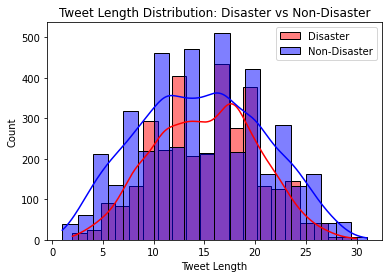

In [24]:
sns.histplot(df_train[df_train["target"] == 1]["tweet_length"], color="red", label="Disaster", kde=True, bins=20)
sns.histplot(df_train[df_train["target"] == 0]["tweet_length"], color="blue", label="Non-Disaster", kde=True, bins=20)

plt.legend()
plt.title("Tweet Length Distribution: Disaster vs Non-Disaster")
plt.xlabel("Tweet Length")
plt.ylabel("Count")
plt.show()

In [25]:
df_train.groupby("target")["tweet_length"].mean()


target
0    14.704744
1    15.167533
Name: tweet_length, dtype: float64

Key takeaways:
- Disaster tweets are generally more concise, because they focus on urgent info
- Non-Disaster tweets show more variation in length, possibly including casual conversations, opinions, or longer discussions.
- The small mean difference suggests tweet length alone may not be a strong indicator of disaster vs. non-disaster.

Count Exclamation Marks (!) which often indicate urgency or emotion

In [26]:
df_train["exclamation_count"] = df_train["text"].str.count("!")
df_train.groupby("target")["exclamation_count"].mean()

target
0    0.194150
1    0.100887
Name: exclamation_count, dtype: float64

Detect URLs in Tweets which are often used in news or alerts

In [27]:
df_train["contains_url"] = df_train["text"].str.contains("http[s]?://", regex=True).astype(int)
df_train["contains_url"].value_counts()

contains_url
1    3971
0    3642
Name: count, dtype: int64

In [28]:
df_train.groupby("target")["contains_url"].mean()


target
0    0.414325
1    0.664017
Name: contains_url, dtype: float64

Key Findings
- Non Disaster tweets use more ! then disaster tweets. This suggests that non-disaster tweets tend to be more expressive or emotional, while disaster tweets may focus more on reporting facts
- Disaster tweets are much more likely to contain URLs than non-disaster tweets since they are often linked to news articles , official updates, or emergency alerts

# 5. Visualizing the Data

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

Tokenize the text and count word frequencies

In [30]:
words = " ".join(df_train["text"].dropna().astype(str)).split()
word_counts = Counter(words)

Convert to a Dataframe and sort by frequency

In [31]:
word_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])
word_df = word_df.sort_values(by="count", ascending=False).head(20)

Plot the bar chart

C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\842798929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=word_df, palette="Blues_d")


Text(0.5, 1.0, 'Frequency of Words')

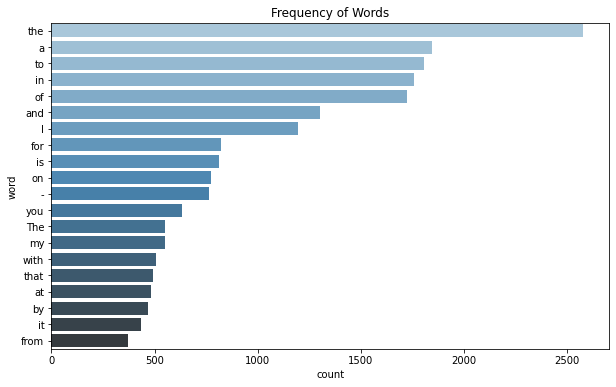

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=word_df, palette="Blues_d")
plt.title("Frequency of Words")

- It can be seen that the top 20 words comrpise mostly articles, prepositions and pronouns, otherwise known as stopwords.

- NLTK provides a list of common stopwords for English.

- We can use this to filter out stopwords from the text.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mukhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\1662566024.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=word_df, palette="Blues_d")


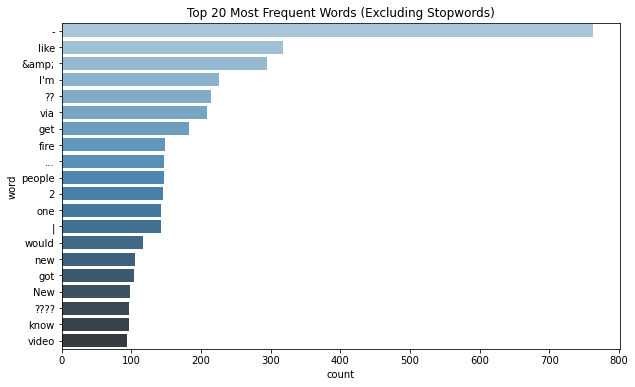

In [33]:
import nltk 
from nltk.corpus import stopwords 
from collections import Counter

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

words = " ".join(df_train["text"].dropna().astype(str)).split()
filtered_words = [word for word in words if word.lower() not in stop_words]

word_counts = Counter(filtered_words)

word_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])
word_df = word_df.sort_values(by="count", ascending=False).head(20)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=word_df, palette="Blues_d")
plt.title("Top 20 Most Frequent Words (Excluding Stopwords)")
plt.show()

Using SpaCy for More Advanced Filtering

C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\2577747932.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="word", data=word_df, palette="Blues_d")


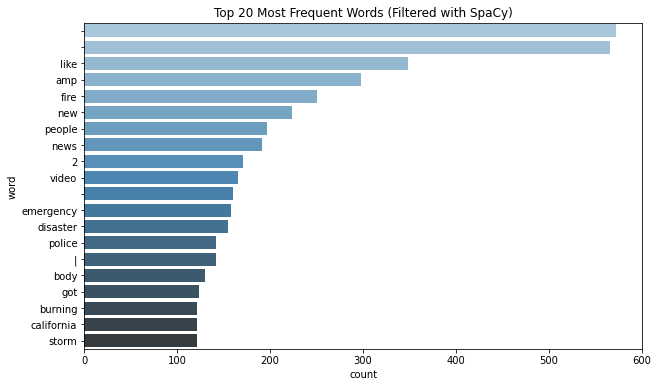

In [34]:
import spacy
from collections import Counter

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Process the text and filter stopwords, punctuation
filtered_words = []
for text in df_train["text"].dropna():
    doc = nlp(text)
    filtered_words.extend([token.text.lower() for token in doc if not token.is_stop and not token.is_punct])

# Count the frequencies of the remaining words
word_counts = Counter(filtered_words)

# Convert to DataFrame and sort by frequency
word_df = pd.DataFrame(word_counts.items(), columns=["word", "count"])
word_df = word_df.sort_values(by="count", ascending=False).head(20)

# Plot the bar chart of most frequent words
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="count", y="word", data=word_df, palette="Blues_d")
plt.title("Top 20 Most Frequent Words (Filtered with SpaCy)")
plt.show()


The above bar chart still contains stop words. Our aim next will be to eliminate those words and bring out the disaster specific words.

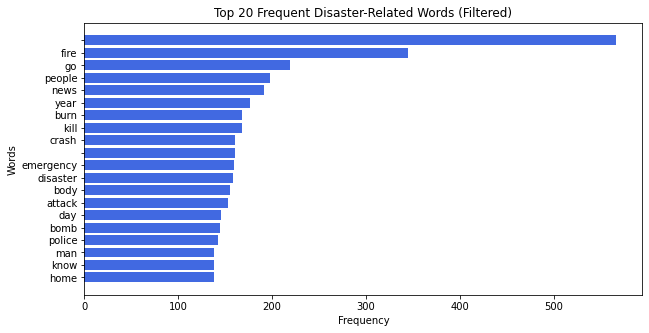

In [35]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Define additional stopwords
custom_stopwords = {"amp", "like", "new", "video", "dash", "2", "I", "|", " ", "    ", "-", "got", "go", "come", "good", "look"}

# Process text and filter stopwords & punctuation
filtered_words = []
for doc in nlp.pipe(df_train["text"].dropna().astype(str)):  
    for token in doc:
        if not token.is_stop and not token.is_punct and token.text.lower() not in custom_stopwords:
            filtered_words.append(token.lemma_.lower())  # Using lemma for normalization

# Count word frequencies
word_freq = Counter(filtered_words)

# Get the top 20 words
top_words = word_freq.most_common(20)

# Plot the word frequency
words, counts = zip(*top_words)
plt.figure(figsize=(10, 5))
plt.barh(words, counts, color="royalblue")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Frequent Disaster-Related Words (Filtered)")
plt.gca().invert_yaxis()  # Highest count on top
plt.show()


The above bar chart shows the top 20 frequent disaster-related words (stopwords are filtered successfully). Some words which are pretty common and disaster specific are: fire, people, burn, kill, crash, emergency, body, attack, bomb, police etc.

# 6. Checking for Duplicate Tweets

In [36]:
duplicate_count = df_train.duplicated(subset=["text"]).sum()
print(f"Number of exact duplicate tweets in train data: {duplicate_count}")

duplicate_count = df_test.duplicated(subset=["text"]).sum()
print(f"Number of exact duplicate tweets in test data: {duplicate_count}")

Number of exact duplicate tweets in train data: 110
Number of exact duplicate tweets in test data: 20


Remove Exact Duplicates

In [37]:
df_train = df_train.drop_duplicates(subset=['text'], keep='first')
print(f"Train data size after removing exact duplicates: {len(df_train)}")

df_test = df_test.drop_duplicates(subset=['text'], keep='first')
print(f"test data size after removing exact duplicates: {len(df_test)}")

Train data size after removing exact duplicates: 7503
test data size after removing exact duplicates: 3243


# 7. Named Entity Recognition

In [38]:
import spacy

nlp = spacy.load("en_core_web_sm")

disaster_entity_labels = {"GPE", "LOC", "EVENT", "ORG", "DATE", "TIME"}

def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ in disaster_entity_labels]
    return entities

df_train["entities"] = df_train["text"].dropna().apply(extract_entities)

df_train[["text", "entities"]].head(20)

,text,entities
0,Our Deeds are the Reason of this #earthquake M...,"[(May ALLAH Forgive, ORG)]"
1,Forest fire near La Ronge Sask. Canada,"[(Canada, GPE)]"
2,All residents asked to 'shelter in place' are ...,[]
3,"13,000 people receive #wildfires evacuation or...","[(California, GPE)]"
4,Just got sent this photo from Ruby #Alaska as ...,"[(Alaska, GPE)]"
5,#RockyFire Update => California Hwy. 20 closed...,"[(Lake County, GPE)]"
6,#flood #disaster Heavy rain causes flash flood...,"[(Manitou, GPE), (Colorado Springs, GPE)]"
7,I'm on top of the hill and I can see a fire in...,[]
8,There's an emergency evacuation happening now ...,[]
9,I'm afraid that the tornado is coming to our a...,[]


As we can see that spacy has performed very poorly in identifying the entities associated with the tweets. 

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7503 entries, 0 to 7612
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7503 non-null   int64 
 1   keyword            7503 non-null   object
 2   location           7503 non-null   object
 3   text               7503 non-null   object
 4   target             7503 non-null   int64 
 5   tweet_length       7503 non-null   int64 
 6   exclamation_count  7503 non-null   int64 
 7   contains_url       7503 non-null   int64 
 8   entities           7503 non-null   object
dtypes: int64(5), object(4)
memory usage: 586.2+ KB


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3243 non-null   int64 
 1   keyword   3243 non-null   object
 2   location  3243 non-null   object
 3   text      3243 non-null   object
dtypes: int64(1), object(3)
memory usage: 126.7+ KB


# 8. Fine tuning DistilBERT on the Disaster DataSet

In [41]:
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, load_dataset, DatasetDict
from sklearn.model_selection import train_test_split
import numpy as np
import evaluate

Train-validation split

In [42]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=42)

In [43]:
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

dataset = DatasetDict({
    "train": train_dataset,
    "validation": val_dataset,
    "test": test_dataset
})

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'target', 'tweet_length', 'exclamation_count', 'contains_url', 'entities', '__index_level_0__'],
        num_rows: 6002
    })
    validation: Dataset({
        features: ['id', 'keyword', 'location', 'text', 'target', 'tweet_length', 'exclamation_count', 'contains_url', 'entities', '__index_level_0__'],
        num_rows: 1501
    })
    test: Dataset({
        features: ['id', 'keyword', 'location', 'text', '__index_level_0__'],
        num_rows: 3243
    })
})


Load DistilBERT Tokenizer

In [44]:
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

Tokenize Data

In [45]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

encoded_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/6002 [00:00<?, ? examples/s]

Map:   0%|          | 0/1501 [00:00<?, ? examples/s]

Map:   0%|          | 0/3243 [00:00<?, ? examples/s]

Remove Unnecessary Details

In [46]:
encoded_dataset["train"] = encoded_dataset["train"].remove_columns(
    ["id", "keyword", "location", "text", "tweet_length", "exclamation_count", "contains_url", "entities", "__index_level_0__"]
).rename_column("target", "labels")

In [47]:
encoded_dataset["validation"] = encoded_dataset["validation"].remove_columns(
    ["id", "keyword", "location", "text", "tweet_length", "exclamation_count", "contains_url", "entities", "__index_level_0__"]
).rename_column("target", "labels")

In [48]:
encoded_dataset["test"] = encoded_dataset["test"].remove_columns(
    ["id", "keyword", "location", "text", "__index_level_0__"]
)

In [49]:
encoded_dataset.set_format("torch")
print(encoded_dataset["train"][0])


{'labels': tensor(1), 'input_ids': tensor([  101,  1030,  2118, 11253, 14919,  2005,  1996,  2111,  2040,  2351,
         1999,  2529,  7885,  2011,  3131,  6421,  2487,  1997,  2887,  2510,
         8299,  1024,  1013,  1013,  1056,  1012,  2522,  1013,  1058,  2615,
        24759,  2546,  4160,  2615, 27814,  2361,  8299,  1024,  1013,  1013,
         1056,  1012,  2522,  1013,  1041,  2290,  2487, 10343,  2243,  4160,
         2497,  2615,  2575,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

Save the tokenized Dataset to disk

In [56]:
encoded_dataset.save_to_disk("encoded_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/6002 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1501 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3243 [00:00<?, ? examples/s]

To load the dataset run the following cell after reboot

In [ ]:
# from datasets import load_from_disk
# encoded_dataset = load_from_disk("encoded_dataset")

In [50]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Define Training Arguments

In [51]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",   # Validate after every epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_strategy="epoch",  # Save after every epoch
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    greater_is_better=True
)


Define Accuracy Metric

In [52]:
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

Initialize Trainer

In [54]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\1125627552.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [55]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.409300,0.385082,0.844104
2,0.315600,0.446542,0.844104


TrainOutput(global_step=1502, training_loss=0.382032869341529, metrics={'train_runtime': 3065.1375, 'train_samples_per_second': 3.916, 'train_steps_per_second': 0.49, 'total_flos': 397534663366656.0, 'train_loss': 0.382032869341529, 'epoch': 2.0})

Get Predictions on Validation Set

In [74]:
predictions = trainer.predict(encoded_dataset["validation"])
logits = predictions.predictions
predicted_labels = np.argmax(logits, axis=1)  # Convert logits to class labels
true_labels = predictions.label_ids  # Actual labels from the validation set

Compute Accuracy, Precision, Recall, and F1-score

In [75]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=["Non-Disaster", "Disaster"])

print(f"Validation Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Validation Accuracy: 0.8441
Classification Report:
               precision    recall  f1-score   support

Non-Disaster       0.83      0.93      0.87       874
    Disaster       0.88      0.73      0.80       627

    accuracy                           0.84      1501
   macro avg       0.85      0.83      0.84      1501
weighted avg       0.85      0.84      0.84      1501



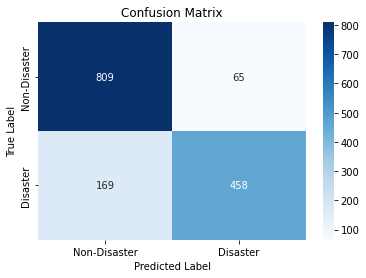

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Disaster", "Disaster"], yticklabels=["Non-Disaster", "Disaster"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Save the trained model

In [57]:
trainer.save_model("./fine_tuned_distilbert")

To reload the trained model after restart, run the following code:

In [60]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("./fine_tuned_distilbert")


# 9. Testing the Model

Tokenize the test set

In [61]:
tokenized_test_dataset = test_dataset.map(lambda x: tokenizer(x['text'], truncation=True, padding=True), batched=True)


Map:   0%|          | 0/3243 [00:00<?, ? examples/s]

In [63]:
trainer = Trainer(
    model=model, 
    args=training_args, 
    tokenizer=tokenizer,
    eval_dataset=tokenized_test_dataset,
)
predictions = trainer.predict(tokenized_test_dataset)


C:\Users\mukhe\AppData\Local\Temp\ipykernel_9284\2795072566.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Process Results

In [70]:
import numpy as np

logits = predictions.predictions
predicted_labels = np.argmax(logits, axis=1) 

print(predicted_labels[:50])

[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 0]


Map Predictions Back to Tweets for Analysis

In [72]:
df_test["predicted_label"] = predicted_labels
print(df_test[["text", "predicted_label"]].head(25))  # View first 10


                                                 text  predicted_label
0                  Just happened a terrible car crash                1
1   Heard about #earthquake is different cities, s...                1
2   there is a forest fire at spot pond, geese are...                1
3            Apocalypse lighting. #Spokane #wildfires                1
4       Typhoon Soudelor kills 28 in China and Taiwan                1
5                  We're shaking...It's an earthquake                1
6   They'd probably still show more life than Arse...                0
7                                   Hey! How are you?                0
8                                    What a nice hat?                0
9                                           Fuck off!                0
10                              No I don't like cold!                0
11                         NOOOOOOOOO! Don't do that!                0
12                             No don't tell me that!                0
13    

From the above data we can see that the model is classifying pretty accurately the disaster vs the non disaster tweets.